# Homework 4

The purpose of this exercise is to analyze mobile app usage data located and described here: http://www0.cs.ucl.ac.uk/staff/S.Lim/app_user_survey/.

Here is the summary of questions and data types:

- Response Status (category)
- Q1 (text): Browser Meta Info
- Q2 (binary): Do you own a mobile device? 
- Q3 (text): What mobile device do you use?
- Q4 (category): Which app store do you use?
- Q5 (category): How frequently do you visit the app store to look for apps?
- Q6 (category): On average, how many apps do you download a month?
- Q7 (dummy): When do you look for apps?
- Q8 (dummy): How do you find apps?
- Q9 (dummy): What do you consider when choosing apps to download?
- Q10 (dummy): Why do you download an app?
- Q11 (dummy): Why do you spend money on an app?
- Q12 (free text): What is the most you have spent on an app?
- Q13 (dummy): Why do you rate apps?
- Q14 (dummy): What makes you stop using an app?
- Q15 (dummy): Which type of apps do you download?
- Q16 (category): ignore!
- Q17 (int): Age
- Q17 - Q28 (categories): demographical questions
- Q24 (int): Years of education
- Q29: income - ignore!
- Q30: personality - ignore!

In [1]:
import re
import requests

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

pd.set_option('float_format', '{:6.2f}'.format)
np.set_printoptions(precision=3, suppress=True)

url = 'http://www.cs.ucl.ac.uk/research/app_user_survey/mobile_app_user_dataset.xlsx'
path = '../../data/mobile_app_user_dataset.xlsx'

## Q1 (5 points)

Download the data file from the web to your hard drive using `requests` library.

In [2]:
# Your code here

## Q2 (5 points)

In the Excel file the first two rows are
- short column name
- corresponding long survey question

Import first only the first two rows to obtain the Series of key-value pairs.

In [3]:
# Your code here

print(questions.head())

ID                                     Unique ID for each participant
StartDate                                                   StartDate
EndDate                                                       EndDate
Response Status     0=incomplete response, 1=complete response, 2=...
Participant Type                                      1=ours, 2=panel
Name: 0, dtype: object


## Q3 (5 points)

Import the whole dataset with the second row as a header.

In [4]:
# Your code here

print(raw.head())

   ID           StartDate             EndDate  Response Status  \
0   1 2012-09-26 07:46:07 2012-09-26 07:46:21                2   
1   2 2012-09-26 07:45:19 2012-09-26 07:56:41                1   
2   3 2012-09-26 07:45:35 2012-09-26 08:01:56                1   
3   4 2012-09-26 16:58:29 2012-09-26 17:05:50                1   
4   5 2012-09-27 04:16:04 2012-09-27 04:24:56                1   

   Participant Type      Q1_1_TEXT     Q1_2_TEXT  \
0                 1         Chrome  21.0.1180.89   
1                 1  Safari iPhone             6   
2                 1         Safari             6   
3                 1        Firefox        15.0.1   
4                 1         Chrome  22.0.1229.79   

                         Q1_3_TEXT  Q1_4_TEXT Q1_5_TEXT   ...    Q30_1  Q30_2  \
0                            WOW64   1280x800   11.3.31   ...      nan    nan   
1  CPU iPhone OS 6_0 like Mac OS X    320x480        -1   ...     6.00   3.00   
2         CPU OS 6_0 like Mac OS X   768x1024  

## Q4 (20 points)

- Rename columns according to the dictionary given below
- Convert these columns into pandas `categorical` type using answers given in the second row of the Excel file. For example, Q2 column (M1 cell) has the following text below (M2 cell): "Do you own a mobile device? (e.g., phone or tablet)-1=Yes, 2=No". Hence, you need to convert column "Q2", or rather "Own mobile" to a categrical type with labels "Yes and "No". Note that they have to be ordered according to initial codes (1 and 2).
- Print value counts for each of those columns.

Full credit is given only for a universal code that works for all columns in the dictionary through the loop. Partial credit is given to a longer case specific solution.

In [5]:
cols = {'Q2': 'Own mobile', 'Q4': 'App Store', 'Q5': 'Freq to use App Store',
        'Q6': 'App downloads', 'Q18': 'Marital status', 'Q19': 'Nationality',
        'Q20': 'Residence', 'Q21': 'Language', 'Q22': 'Ethnicity',
        'Q23': 'Education', 'Q25': 'Disability', 'Q26': 'Employment',
        'Q27': 'Occupation', 'Q28': 'Currency'}

# Your code here

for col_code, col_name in cols.items():
    print(data1[col_name].value_counts(), '\n')

Full-time         2027
Student           1091
Part-time          533
Retired            455
Unemployed         436
Self-employed      380
Homemaker          279
Unable to work      79
Other               36
Name: Employment, dtype: int64 

[0 - 1]           2574
[2 - 5]           2168
[6 - 10]           735
[11 - 20]          382
[21 - 30]          131
[More than 30]      97
Name: App downloads, dtype: int64 

English       1480
Spanish        583
Mandarin       569
Portuguese     456
Other          402
Japanese       356
French         355
Russian        337
Italian        280
German         277
Korean         271
Name: Language, dtype: int64 

Yes    8992
No     1208
Name: Own mobile, dtype: int64 

White                2122
Asian                1644
Prefer not to say     556
Hispanic              362
Other                 298
Mixed                 297
Black                  87
Name: Ethnicity, dtype: int64 

Never                     1086
Less than once a month    1022
More than onc

## Q4.1 (bonus, not graded)

Rename columns that start with "Q1\_" using the text given in the second row of the Excel file, but after the words "Browser Meta Info-". For example, column "Q1\_7\_TEXT" should be renamed into "Browser".

In [6]:
# Your code here

print(data2[list(browser_meta.values())].head())

         Browser Flash Version                 Operating System  \
0         Chrome       11.3.31                            WOW64   
1  Safari iPhone            -1  CPU iPhone OS 6_0 like Mac OS X   
2         Safari            -1         CPU OS 6_0 like Mac OS X   
3        Firefox      11.4.402              Intel Mac OS X 10.6   
4         Chrome      11.4.402            Intel Mac OS X 10_7_4   

  Screen Resolution       Version  Java Support  \
0          1280x800  21.0.1180.89          1.00   
1           320x480             6          0.00   
2          768x1024             6          0.00   
3         1920x1200        15.0.1          1.00   
4          1280x800  22.0.1229.79          1.00   

                                          User Agent  
0  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  
1  Mozilla/5.0 (iPhone; CPU iPhone OS 6_0 like Ma...  
2  Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) A...  
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...  
4  Mozilla/5.0 

## Q5 (20 points)

Write a function that takes in two arguments: the dataset and a column name. The function returns the table where rows are categories from the specified column name, and columns are app downloads. The values are shares of each category among each "App downloads" category.

In [7]:
def who_downloads_apps(data, col):
    """Compute shares of col categories by 'App downloads'"""
    
    # Your code here
    
    return df

print(who_downloads_apps(data2, 'Education'))

App downloads            [0 - 1]  [2 - 5]  [6 - 10]  [11 - 20]  [21 - 30]  \
Education                                                                   
Undergraduate degree       23.74    27.03     36.76      42.05      40.17   
Master’s degree            10.69    11.07      9.71      11.08      10.26   
Diploma                    23.55    20.29     17.65      12.78      22.22   
Secondary / High school    27.28    30.84     25.59      25.57      20.51   
Doctoral degree             2.93     2.78      1.32       1.70       2.56   
Vocational training         9.83     6.28      6.47       5.40       3.42   
Primary school              1.51     1.44      1.76       0.85       0.85   
Other                       0.47     0.26      0.74       0.57       0.00   

App downloads            [More than 30]  
Education                                
Undergraduate degree              36.05  
Master’s degree                   23.26  
Diploma                           17.44  
Secondary / High sc

## Q6 (5 points)

Who is the heaviest app user by mariatal status? By ethnicity?

In [8]:
# Your code here

Marital status
Married              44.32
Single               38.64
In a relationship    13.64
Widowed               2.27
Divorced              1.14
Separated             0.00
Other                 0.00
Name: [More than 30], dtype: float64


Ethnicity
Asian                51.14
White                19.32
Prefer not to say    12.50
Other                 6.82
Mixed                 5.68
Hispanic              4.55
Black                 0.00
Name: [More than 30], dtype: float64


## Q7 (5 points)

Separate respondents into groups by age in 10 year increments. Print value counts.

In [9]:
# Your code here

print(data2['Age group'].value_counts())

(20, 30]    1511
(30, 40]    1156
(10, 20]     961
(40, 50]     695
(60, 70]     458
(50, 60]     400
(70, 80]     167
(80, 90]      18
Name: Age group, dtype: int64


## Q8 (5 points)

Who is the heaviest app user by age group? Plot histogram.

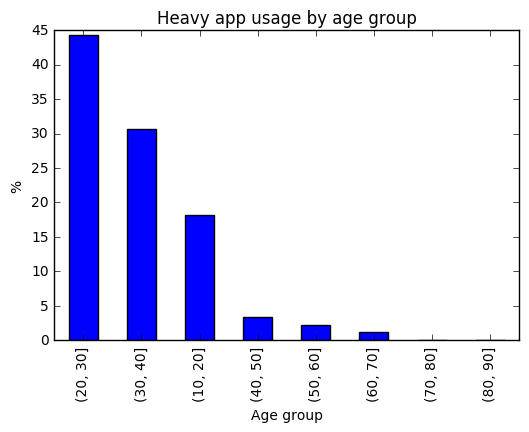

In [10]:
# Your code here